In [1]:
#%matplotlib inline
from collections import defaultdict, OrderedDict
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

/home/sigmaroles/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
from util_kw import *

In [3]:
path_root_processed='./processedText'
path_models = './word2vec_models'
path_phraser_models='./phraser_models'

journal = 'IN-indianexpress-editorials' 
mypath_processed = path_root_processed +'/'+journal 

wvm = Word2Vec.load(path_models+'/'+journal+'_with_phraser').wv
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

In [13]:
def count_words(myp_p, journ, lista):
    fpath = path_phraser_models + '/' + journ + '_00_bigramphraser'
    print (fpath)
    
    bigram = Phraser.load(fpath)
    texts = {}
    
    for fname in os.listdir(myp_p):
        #print ("Doing "+fname)
        text = []
        for line in open(myp_p + '/' + fname, 'r'):
            text = text + bigram[line.split()]
        
        #print (len(text))
        
        frequency = defaultdict(float)
        for word in text:
            frequency[word] += 1
        
        texts[fname] = frequency
    
    word_count = {}   
    
    for fname in texts.keys():
        count = 0.0
        for word in lista.keys() :
            if word in texts[fname].keys() :
                count = count + texts[fname][word] * lista[word]
        word_count[fname] = count
        
    return word_count

In [14]:
def generate_time_series(l_words):
    wc = count_words(mypath_processed, journal, l_words)
    
    wc_summary = defaultdict(float)
    for d in wc.keys() :
        m = re.search('([0-9\-]+)\_', d)
        wc_summary[pd.to_datetime(m.group(1))] += wc[d]

    wc_ordered = OrderedDict(sorted(wc_summary.items()))
    ts_ret = pd.Series(wc_ordered.values(), index=wc_ordered.keys())
    return ts_ret

In [15]:
ts1 = generate_time_series(get_words(wvm, 'violence'))
ts2 = generate_time_series(get_words(wvm, 'muslim'))

./phraser_models/IN-indianexpress-editorials_00_bigramphraser
./phraser_models/IN-indianexpress-editorials_00_bigramphraser


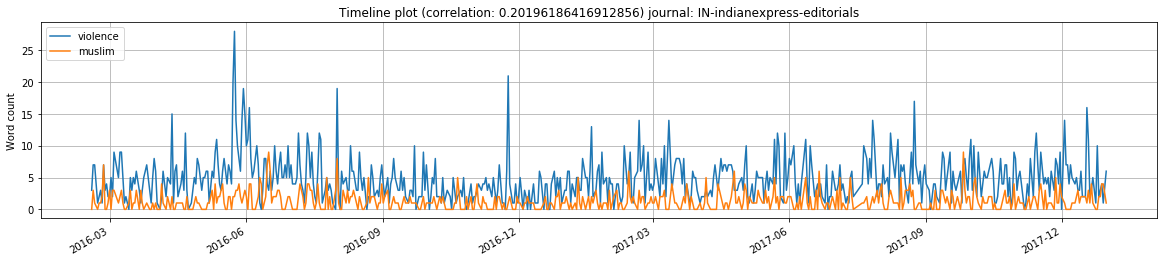

In [21]:
txt = '(correlation: '+ str(ts1.corr(ts2,method='pearson')) +') journal: '+ journal
plt.figure(figsize=(20,4))
ts1.plot(label='violence')
ts2.plot(label='muslim')
#plt.plot_date(x=wc_ordered.keys(), y=wc_ordered.values(), fmt="r-")
plt.title("Timeline plot "+ txt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()

In [19]:
ts1 = generate_time_series(get_words(wvm, 'dalits'))
ts2 = generate_time_series(get_words(wvm, 'incident'))

./phraser_models/IN-indianexpress-editorials_00_bigramphraser
./phraser_models/IN-indianexpress-editorials_00_bigramphraser


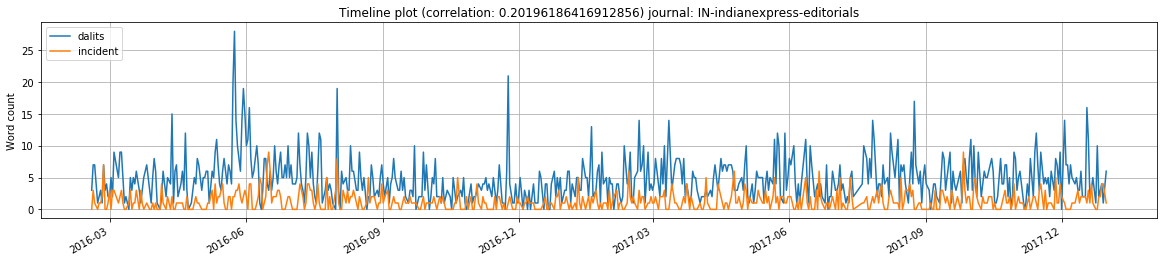

In [22]:
txt = '(correlation: '+ str(ts1.corr(ts2,method='pearson')) +') journal: '+ journal
plt.figure(figsize=(20,4))
ts1.plot(label='dalits')
ts2.plot(label='incident')
#plt.plot_date(x=wc_ordered.keys(), y=wc_ordered.values(), fmt="r-")
plt.title("Timeline plot "+ txt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()